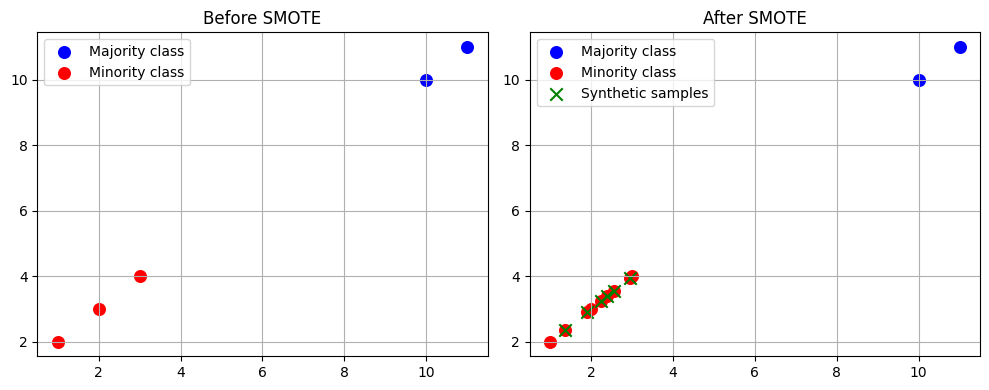

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def smote(X, y, minority_class=1, N=100, k=5):
    """
    Simple SMOTE implementation from scratch.

    Parameters:
    -----------
    X : ndarray
        Feature matrix
    y : ndarray
        Labels
    minority_class : int
        The label of the minority class
    N : int
        Oversampling percentage (e.g., 100 means doubling the minority samples)
    k : int
        Number of nearest neighbors to consider

    Returns:
    --------
    X_res, y_res, X_synthetic : ndarray
        Augmented dataset, labels, and only the synthetic samples
    """
    # Step 1: Extract minority samples
    X_minority = X[y == minority_class]
    n_minority = X_minority.shape[0]

    # Number of synthetic samples to generate
    n_synthetic = (N // 100) * n_minority

    # Step 2: Find k nearest neighbors for each minority sample
    neigh = NearestNeighbors(n_neighbors=k+1)  # +1 because the sample itself is included
    neigh.fit(X_minority)
    neighbors = neigh.kneighbors(X_minority, return_distance=False)[:, 1:]

    # Step 3: Generate synthetic samples
    synthetic_samples = []
    for _ in range(n_synthetic):
        # Pick a random minority sample
        idx = np.random.randint(0, n_minority)
        x_i = X_minority[idx]

        # Pick one of its k neighbors randomly
        neighbor_idx = np.random.choice(neighbors[idx])
        x_neighbor = X_minority[neighbor_idx]

        # Create synthetic sample
        diff = x_neighbor - x_i
        gap = np.random.rand()
        x_new = x_i + gap * diff
        synthetic_samples.append(x_new)

    X_synthetic = np.array(synthetic_samples)
    y_synthetic = np.array([minority_class] * len(X_synthetic))

    # Step 4: Combine with original dataset
    X_res = np.vstack((X, X_synthetic))
    y_res = np.hstack((y, y_synthetic))

    return X_res, y_res, X_synthetic


# ==== Example ====
if __name__ == "__main__":
    # Small toy dataset (class 1 is the minority)
    X = np.array([[1, 2], [2, 3], [3, 4], [10, 10], [11, 11]])
    y = np.array([1, 1, 1, 0, 0])

    # Apply SMOTE
    X_res, y_res, X_synthetic = smote(X, y, minority_class=1, N=200, k=2)

    # Plot before and after
    plt.figure(figsize=(10, 4))

    # Before SMOTE
    plt.subplot(1, 2, 1)
    plt.scatter(X[y==0, 0], X[y==0, 1], label="Majority class", c="blue", s=70)
    plt.scatter(X[y==1, 0], X[y==1, 1], label="Minority class", c="red", s=70)
    plt.title("Before SMOTE")
    plt.legend()
    plt.grid()

    # After SMOTE
    plt.subplot(1, 2, 2)
    plt.scatter(X_res[y_res==0, 0], X_res[y_res==0, 1], label="Majority class", c="blue", s=70)
    plt.scatter(X_res[y_res==1, 0], X_res[y_res==1, 1], label="Minority class", c="red", s=70)
    plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], label="Synthetic samples", c="green", marker="x", s=80)
    plt.title("After SMOTE")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


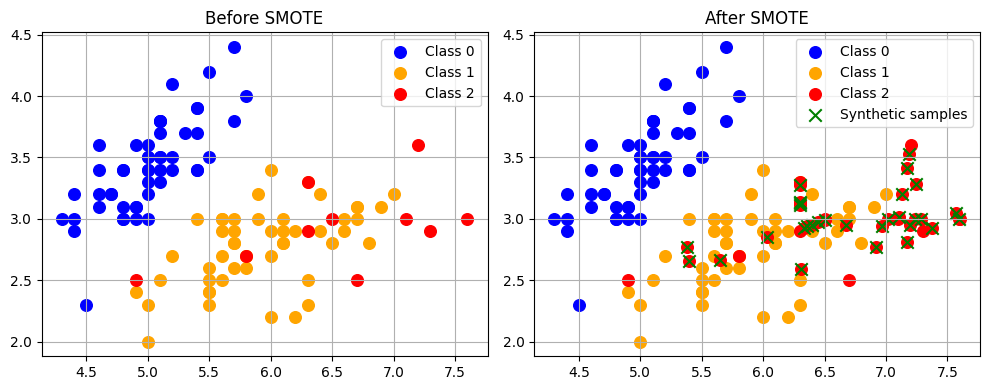

In [8]:
from sklearn.datasets import load_iris

if __name__ == "__main__":
    iris = load_iris()
    X = iris.data[:, :2]  # use only first 2 features for visualization
    y = iris.target

    # Make class '2' the minority class for demonstration
    # Keep fewer samples of class 2
    X = np.vstack((X[y != 2], X[y == 2][:10]))  # only 10 samples of class 2
    y = np.hstack((y[y != 2], y[y == 2][:10]))

    minority_class = 2

    # Apply SMOTE
    X_res, y_res, X_synthetic = smote(X, y, minority_class=minority_class, N=300, k=5)

    # Plot before and after
    plt.figure(figsize=(10, 4))

    # Before SMOTE
    plt.subplot(1, 2, 1)
    for label, color in zip(np.unique(y), ["blue", "orange", "red"]):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Class {label}", s=70, c=color)
    plt.title("Before SMOTE")
    plt.legend()
    plt.grid()

    # After SMOTE
    plt.subplot(1, 2, 2)
    for label, color in zip(np.unique(y_res), ["blue", "orange", "red"]):
        plt.scatter(X_res[y_res == label, 0], X_res[y_res == label, 1], label=f"Class {label}", s=70, c=color)
    plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], label="Synthetic samples", c="green", marker="x", s=80)
    plt.title("After SMOTE")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
